# K-Nearest Neighbors (Euclidean distance)

Im folgendem wird ein Machine Learning Klassifizierungsproblem mithilfe des `K-Nearest-Neighbors` gelöst. <br />
Als distanzbestimmungsformel wird die `euclidean distance` genutzt.

Als Datenset wird das Iris Datenset genutzt. Wichtig hierbei, ist die analogie der Pflanze:

![test](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)


https://www.ibm.com/topics/knn

Dataset based on https://gist.github.com/nafiul-nipu/c46c3297aec7843016359a98467b17d3

In [ ]:
# Dependency installieren
!{sys.executable} -m pip install pandas

import pandas as pd

In [55]:
# CSV Datei einlesen und auf ein 2D Array mappen
iris_dataset_file = pd.read_csv("iris_dataset.csv", sep=",", header=None)
iris_dataset = iris_dataset_file.values

feature_names = iris_dataset[0]
iris_dataset = iris_dataset[1:]

# Ersten 5 Reihen ausgeben um Werte anzusehen
print(iris_dataset_file.head(5))

              0            1             2            3        4
0  sepal_length  sepal_width  petal_length  petal_width  species
1           5.1          3.5           1.4          0.2   setosa
2           4.9          3.0           1.4          0.2   setosa
3           4.7          3.2           1.3          0.2   setosa
4           4.6          3.1           1.5          0.2   setosa


In [142]:
from sklearn.preprocessing import StandardScaler

# In Machine Learning Context steht groß X für die tatsächlichen Daten und
# y für die Zuordnung.
# Wir nutzen hier "StandardScaler().fit_transform" um die Daten zu normalisieren (Nur Werte zwischen 0 und 1)
X = StandardScaler().fit_transform(iris_dataset[:, 0:4])
y = iris_dataset[:, 4]

In [94]:
# Testen ob in X wirklich nur Werte und keine Klassifizierungen mehr stehen
print(X[0:5])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [95]:
# print first dataset of the iris dataset
example_data = X[0]

print(f"Classification: \"{Y[0]}\"")
print("--------------")

for index, data_point in enumerate(example_data):
    print(feature_names[index] + f":  {data_point}")

Classification: "setosa"
--------------
sepal_length:  -0.9006811702978088
sepal_width:  1.0320572244889565
petal_length:  -1.3412724047598314
petal_width:  -1.3129767272601454


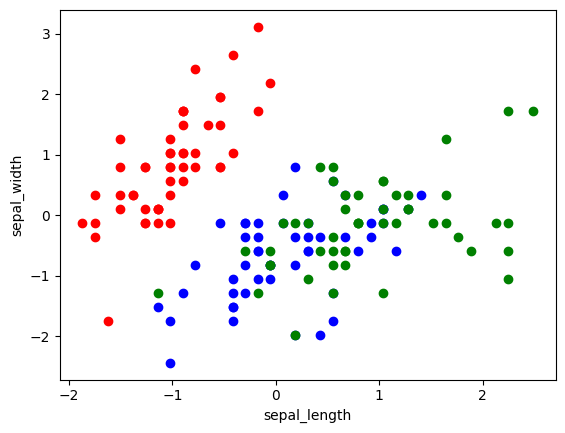

In [97]:
import matplotlib.pyplot as plt

COLORS = {
    "setosa": "r",
    "virginica": "g",
    "versicolor": "b"
}

def show_graph(feature_one: int, feature_two: int):
    fig, ax = plt.subplots()

    for index, data in enumerate(X):
        classification = y[index]
        ax.scatter(data[feature_one], data[feature_two], color=COLORS[classification])

    # set a title and labels
    ax.set_xlabel(feature_names[feature_one])
    ax.set_ylabel(feature_names[feature_two])

    plt.show()


show_graph(0, 1)

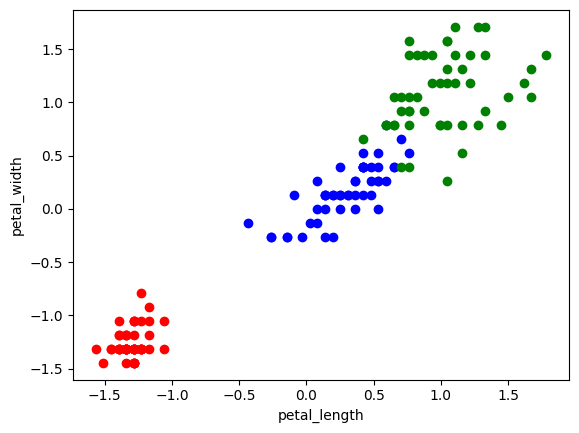

In [98]:
show_graph(2, 3)

Beim ausgeben der Daten ist also ein klarer Zusammenhang zwischen den Features (sepal/petal width & length) ersichtlich.

Klare Klassifizierung der Daten möglich!

Nun definieren wir eine Methode, die die euclidean distance berechnet. Die Formel lautet wie folgt: 

$$d\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 } $$

In [198]:
import math
import numpy

def euclidean_distance(first_point: numpy.ndarray, second_point: numpy.ndarray) -> float:
    distance = 0

    for dimension in range(len(second_point) - 1):
        distance += (second_point[dimension] - first_point[dimension])**2

    return math.sqrt(distance)

In [199]:
class KNearestNeighborsClassifier():
    def __init__(self, k: int):
        self.k = k

    def fit(self, X_train: numpy.ndarray, y_train: numpy.ndarray):
        self.X_train = X_train
        self.Y_train = y_train

    def predict(self, X_test: numpy.ndarray) -> str:
        distances = []
        for index, training_row in enumerate(self.X_train):
            calculated_distance = euclidean_distance(X_test, training_row)
            distances.append((y[index], calculated_distance))

        distances.sort(key=lambda tup: tup[1])
        neighbors = []

        for index in range(self.k):
            neighbors.append(distances[index][0])

        prediction = max(set(neighbors), key=neighbors.count)

        return prediction

In [200]:
knn = KNearestNeighborsClassifier(k=5)
knn.fit(X, y)

print(f"Prediction: {knn.predict(X[100])}")

Prediction: virginica
